# Computing performance metrics in Pure Python without scikit-learn

Here I will compute following for the dataset 5_a.csv


 - Compute Confusion Matrix

 - Compute F1 Score

 - Compute AUC Score, we need to compute different thresholds and for each threshold compute tpr,fpr and then use

  Note 1: in this data we can see number of positive points >> number of negatives points

  Note 3: we need to derive the class labels from given score
  
  ## $$y^{pred} = [0 \text{ if } y_{score} < 0.5  \text{ else }  1]$$

- Compute Accuracy Score

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

df_5_a = pd.read_csv('./5_a.csv')

print(df_5_a.shape)
df_5_a.head()

(10100, 2)


,y,proba
0,1.0,0.637387
1,1.0,0.635165
2,1.0,0.766586
3,1.0,0.724564
4,1.0,0.889199


In [3]:
df_5_a['y_predicted'] = np.where(df_5_a['proba'] >= 0.5, float(1), float(0))
df_5_a.head()


,y,proba,y_predicted
0,1.0,0.637387,1.0
1,1.0,0.635165,1.0
2,1.0,0.766586,1.0
3,1.0,0.724564,1.0
4,1.0,0.889199,1.0


In [4]:
# Checking to see if there's any 'proba' less than or equal to 0.5
# And there is none. So all y_predicted will be classified as 1
# df = df_5_a.loc[df_5_a['proba'] <= 0.5 ]
# df.head()

In [5]:
# print(df_5_a.to_numpy())
actual_y_train_arr = df_5_a.iloc[:, 0].values
print('actual_y_train_arr ', actual_y_train_arr)
predicted_y_arr = df_5_a.iloc[:, 2].values
print('predicted_y_arr ', predicted_y_arr)
y_proba = df_5_a.iloc[:, 1].values

actual_y_train_arr  [1. 1. 1. ... 1. 1. 1.]
predicted_y_arr  [1. 1. 1. ... 1. 1. 1.]


#### In below implementation, for a binary class-label (1 and 0 ) I will have 'true-nagative' at the top left of the final confusion matrix, as the traversing of the unique_classes array will start from 0

![img](https://i.imgur.com/MvapmPv.png[/img])

In [6]:

def calculate_confusion_matrix(true_y_classes_array, predicted_y_classes_array):

  # extract all unique classes from the train y class
  unique_classes = np.unique(true_y_classes_array)
  # print('unique', unique_classes)

  # initialize a matrix with zero values that will be the final confusion matrix
  confusion_matrix = np.zeros((len(unique_classes), len(unique_classes)))

  for i in range(len(unique_classes)):
    for j in range(len(unique_classes)):
      confusion_matrix[i, j] = np.sum((true_y_classes_array == unique_classes[i]) & (predicted_y_classes_array == unique_classes[j]))

  return confusion_matrix

# actual_y_class_list = [1, 3, 3, 2, 5, 5, 3, 2, 1, 4, 3, 2, 1, 1, 2]
# predicted_y_class_list = [1, 2, 3, 4, 2, 3, 3, 2, 1, 2, 3, 1, 5, 1, 1]

# Only binary class dataset
actual_y_class_list = [1, 1, 1, 0, 0]
predicted_y_class_list =   [1, 1, 1, 0, 1]

print(calculate_confusion_matrix(actual_y_class_list, predicted_y_class_list))

[[1. 1.]
 [0. 3.]]


## Explanations on the above calculate_confusion_matrix() funcion

[In above implementation, for a binary class-label (1 and 0 ) I will have 'true-nagative' at the top left of the final confusion matrix, as the traversing of the unique_classes array will start from 0 ]

#### 1.np.zeros()  - the first arg of np.zeros() is the shape which is a tuple of ints or simple int

e.g., (2, 3) or 2.

---

#### 2. Now for each row, I need to compare the values between true_y_classes_array and predicted_y_classes_array

So, I will implement this by comparing each element from true_y_classes_array with each of the unique array's elements and then the same for  predicted_y_classes_array

It will give me a list of True / False. Lets see this example

```python
arr1 = [1, 1, 2, 6, 4]
arr2 = np.unique(arr1) # [1 2 4 6]

print("comparing ",  arr1 == arr2[0])
# comparing [ True  True False False False]
```

That is, the above will compare the whole of arr1 with arr2[0] which is 1

---

### 3. An now use np.sum() to count number of True value

```python
print('np.sum of above True False numpy array ', np.sum(arr1 == arr2[0]))

# np.sum of above True False numpy array  2
```

Note that above kind of operation will only work with `np.unique()` which returns a numpy array, and will not work with plain python list

---

### 4. So now for the confusion matrix, I need to fill up with matching counts of

#### Note `unique_classes[0]` is 1 and `unique_classes[1]` = 0

### For first row of my final confusion_matrix

confusion_matrix[0,0] => i.e. i, j = 0, 0 => will have the Total 'True' count (i.e. `np.sum()`)  of following conditions

`(true_y_classes_array == unique_classes[0]) & (predicted_y_classes_array == unique_classes[0])`

Similarly for `confusion_matrix[0, 1]` => i.e. i, j = 0, 1  => will have the Total 'True' count (i.e. `np.sum()`)  of following conditions

`(true_y_classes_array == unique_classes[0]) & (predicted_y_classes_array == unique_classes[1])`

#### And for second row of my final confusion_matrix

confusion_matrix[1,0] => will have the Total 'True' count (i.e. `np.sum()`)  of following conditions

`(true_y_classes_array == unique_classes[1]) & (predicted_y_classes_array == unique_classes[0])`

Similarly for confusion_matrix[1, 1] => will have the Total 'True' count (i.e. `np.sum()`)  of following conditions

`(true_y_classes_array == unique_classes[1]) & (predicted_y_classes_array == unique_classes[1])`

"""

---

# Confusion matrix of binary class-labels placing 'true-positive' / TF at the top left of Matrix

### If for a binary class-label I have to place 'true-positive' / TF at the top left of the final confusion matrix

i.e. the top-left will have 1 instead of 0 in the final confusion matrix then only need to reverse the unique_classes variable as below.

In [7]:
def get_confusion_matrix(true_y_classes_array, predicted_y_classes_array):
  
  unique_classes = np.unique(true_y_classes_array)
  # For a binary class the above will give me [0 1] numpy array
  # so top-left of confusion matrix will start from 0 i.e. 'True Negative'

  # But the challenge here asks that the top left will be 'True Positive'
  # Hence I need to reverse the above numpy array
  unique_classes = unique_classes[::-1]
  # print('reversed unique', unique_classes) # will convert the above array to [1 0]

  # initialize a matrix with zero values that will be the final confusion matrix
  # For the binary class-label dataset, this confusion matrix will be a 2*2 square matrix
  confusion_matrix = np.zeros((len(unique_classes), len(unique_classes)))

  for i in range(len(unique_classes)):
    for j in range(len(unique_classes)):
      confusion_matrix[i, j] = np.sum((true_y_classes_array == unique_classes[j]) & (predicted_y_classes_array == unique_classes[i]))

  return confusion_matrix

confusion_matrix_5_a = get_confusion_matrix(actual_y_train_arr, predicted_y_arr)
print(confusion_matrix_5_a)

true_negative, false_positive, false_negative, true_positive = int(confusion_matrix_5_a[1][1]), int(confusion_matrix_5_a[0][1]), int(confusion_matrix_5_a[1][0]), int(confusion_matrix_5_a[0][0])

[[10000.   100.]
 [    0.     0.]]


### Explanations and notes on above Confusion matrix function

![img](https://i.imgur.com/1A3Izpg.png)

#### Note `unique_classes[0]` is 1 and `unique_classes[1]` = 0

### For first row of my final confusion_matrix

`confusion_matrix[0,0]` => i.e. i, j = 0, 0 => will have the Total 'True' count (i.e. `np.sum()`) of following conditions

`(true_y_classes_array == unique_classes[0]) & (predicted_y_classes_array == unique_classes[0])`

Similarly for `confusion_matrix[0, 1]` => i.e. i, j = 0, 1 => will have the Total 'True' count (i.e. `np.sum()`)  of following conditions

`(true_y_classes_array == unique_classes[1]) & (predicted_y_classes_array == unique_classes[0])`

---

### Now second row

And for second row of my final confusion_matrix

`confusion_matrix[1,0]`  => i.e. i, j = 1, 0 => will have the Total 'True' count (i.e. `np.sum()`)  of following conditions

`(true_y_classes_array == unique_classes[0]) & (predicted_y_classes_array == unique_classes[1])`

Similarly for `confusion_matrix[1, 1]`  => i.e. i, j = 1, 1  => will have the Total 'True' count (i.e. `np.sum()`) of following conditions


`(true_y_classes_array == unique_classes[1]) & (predicted_y_classes_array == unique_classes[1])`

In [8]:
# To check that the total num of elements of the original dataframe matches
# with the counts captured in the confusion matrix
# sum-all-the-elements-of-the confusion_matrix_5_a
sum_all_elements_of_confusion_matrix = np.concatenate(confusion_matrix_5_a).sum()
print(sum_all_elements_of_confusion_matrix == df_5_a.shape[0] )

True


In [9]:
# Testing my custom confusion_matrix result with scikit-learn
from sklearn.metrics import confusion_matrix
sklearn_confustion_matrix = confusion_matrix(actual_y_class_list, predicted_y_class_list)
print(sklearn_confustion_matrix)

[[1 1]
 [0 3]]


In [10]:
tn, fp, fn, tp = confusion_matrix(actual_y_class_list, predicted_y_class_list).ravel()
print(tn, fp, fn, tp)
print(true_negative, false_positive, false_negative, true_positive)

1 1 0 3
0 100 0 10000


### From above we can see the values of the confution Matrix matches between scikit-learn and our custom-implementation



---

## F1 Score

![img](https://i.imgur.com/ZPntYB0.jpg)

![Imgur](https://imgur.com/qy5Fesd.jpg)


In [11]:
# the below function will work only for
# binary confusion matrix
def get_f1_score_accuracy_score(binary_conf_matrix):
    true_negative  = binary_conf_matrix[1][1]    
    false_positive = binary_conf_matrix[0][1]
    false_negative = binary_conf_matrix[1][0]
    true_positive = binary_conf_matrix[0][0]

    precision = true_positive / (true_positive + false_positive)
    recall = true_positive/ (true_positive + false_negative)
    
    f1_score = (2 * (precision * recall)) / (precision + recall )
    
    sum_all_elements_of_confusion_matrix = np.concatenate(binary_conf_matrix).sum()
    
    accuracy_score = (true_positive + true_negative)/sum_all_elements_of_confusion_matrix
    
    return f1_score, accuracy_score


print("My custom function's f1_score and accuracy_score ", get_f1_score_accuracy_score(confusion_matrix_5_a))  



My custom function's f1_score and accuracy_score  (0.9950248756218906, 0.9900990099009901)


### Now verifying the above F1-Score with that of sk-learn


In [12]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

sklearn_f1_score = f1_score(actual_y_train_arr, predicted_y_arr)
print('sklearn_f1_score ', sklearn_f1_score)

sklearn_accuracy_score = accuracy_score(actual_y_train_arr, predicted_y_arr)
print('sklearn_accuracy_score ', sklearn_accuracy_score)


sklearn_f1_score  0.9950248756218906
sklearn_accuracy_score  0.9900990099009901


## From above we can see the values of1_score, accuracy_score matches between scikit-learn and our custom-implementation

# Note on ROC Curve

The ROC curve is plotted with TPR against the FPR where TPR is on y-axis and FPR is on the x-axis.

In Machine Learning, performance measurement is an essential task. So when it comes to a classification problem, we can count on an AUC - ROC Curve. When we need to check or visualize the performance of the multi - class classification problem, we use AUC (Area Under The Curve) ROC (Receiver Operating Characteristics) curve. It is one of the most important evaluation metrics for checking any classification model’s performance. It is also written as AUROC (Area Under the Receiver Operating Characteristics)

### What is AUC - ROC Curve?

AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. By analogy, Higher the AUC, better the model is at distinguishing between patients with disease and no disease.
The ROC curve is plotted with TPR against the FPR where TPR is on y-axis and FPR is on the x-axis.



---

# AUC-ROC Score Calculation

The Receiver Operating Characetristic (ROC) curve is a graphical plot that allows us to assess the performance of binary classifiers. With imbalanced datasets, the Area Under the Curve (AUC) score is calculated from ROC and is a very useful metric in imbalanced datasets.

TPR and FPR are defined as follows:

- TPR = True Positives / All Positives
- FPR = False Positives / All negatives

In [13]:

def get_single_tpr_fpr(df):

    '''
    Note, this implementation is only for binaly class labels (0 and 1)
    :param df: the dataframe should have 'y' and 'y_predicted' as its labels
    :return: a list containing tpr and fpr
    '''

    tp = ((df['y'] == 1.0 ) & (df['y_predicted'] == 1)).sum()
    fp = ((df['y'] == 0.0 ) & (df['y_predicted'] == 1)).sum()
    tn = ((df['y'] == 0.0 ) & (df['y_predicted'] == 0)).sum()
    fn = ((df['y'] == 1.0 ) & (df['y_predicted'] == 0)).sum()

    tpr = tp / (tp + fn )
    fpr = fp / (fp + tn)

    return [tpr, fpr]


# While computing AUC score you need to calculate "TP,"FP" at every threshold by using actual "y" and predicted "y_pred".

def calculate_all_thresholds_tpr_fpr_arr(df_original):

    '''

    :param df_original: the original dataframe, which should have a 'proba' label
    :return: two arrays, tpr_arr_for_all_thresholds, fpr_arr_for_all_thresholds
    '''

    tpr_arr_for_all_thresholds = []
    fpr_arr_for_all_thresholds = []

    sorted_df = df_original.sort_values(by=['proba'], ascending=False)

    unique_probability_thresholds = sorted_df['proba'].unique()

    for threshold in tqdm(unique_probability_thresholds):
        sorted_df['y_predicted'] = np.where(sorted_df['proba'] >= threshold, 1, 0)
        tpr_fpr_arr = get_single_tpr_fpr(sorted_df)
        tpr_arr_for_all_thresholds.append(tpr_fpr_arr[0])
        fpr_arr_for_all_thresholds.append(tpr_fpr_arr[1])

    return tpr_arr_for_all_thresholds, fpr_arr_for_all_thresholds


### Now finally the AUC Score

In [14]:
from tqdm import tqdm
all_tpr_together_5_a, all_fpr_together_5_a = calculate_all_thresholds_tpr_fpr_arr(df_5_a)
auc_score_5_a = np.trapz(all_tpr_together_5_a, all_fpr_together_5_a)
print('My Custom function ROC-AUC Score for 5_a.csv: ', auc_score_5_a)
# My Custom function ROC-AUC Score for 5_a.csv:  0.48829900000000004

100%|██████████| 10100/10100 [00:15<00:00, 643.04it/s]

My Custom function ROC-AUC Score for 5_a.csv:  0.48829900000000004


In [15]:
# Checking result with scikit-learn
sklearn_roc_auc_score = roc_auc_score(actual_y_train_arr, y_proba)
print('sk-learn roc_auc_score for 5_a.csv: ', sklearn_roc_auc_score)
# sk-learn roc_auc_score:  0.48829900000000004

sk-learn roc_auc_score for 5_a.csv:  0.48829900000000004


## As we can see above the roc_auc_score matches between my Custom function and that of sklearn

Text(0.5, 1.0, 'AUC=0.4883')

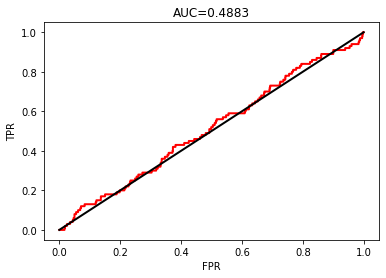

In [16]:
# Plotting of ROC-AUC Curve

plt.plot(all_tpr_together_5_a, all_fpr_together_5_a, 'r', lw=2)
plt.plot([0, 1], [0, 1], 'k-', lw=2)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AUC={}'.format(round(auc_score_5_a, 4)))


## Annotating threshold value in the RUC-AOC curve

When we only plot the TPR and the FPR against each other we'll loose the threshold information. However, we can easily add them to the plot. In the below example with some randomly generated X and Y data, I annotated every 5th value but this should be enough the see the relationship (high confidence - bottom left, low confidence - top right).

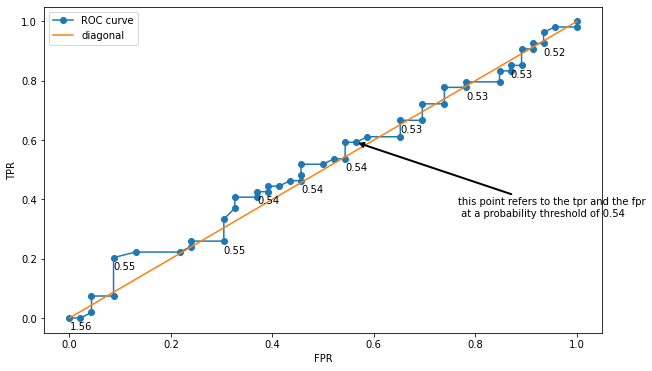

In [17]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

x = np.random.randint(40, 400, 100).reshape(-1, 1)
y = np.random.randint(0, 2, 100)

model = LogisticRegression()
model.fit(x, y)
probs = model.predict_proba(x)
fpr, tpr, thresholds = metrics.roc_curve(y, probs[:,1])

# %%
plt.subplots(figsize=(10, 6))
plt.plot(fpr, tpr, 'o-', label="ROC curve")
plt.plot(np.linspace(0,1,10), np.linspace(0,1,10), label="diagonal")
for x, y, txt in zip(fpr[::5], tpr[::5], thresholds[::5]):
    plt.annotate(np.round(txt,2), (x, y-0.04))
rnd_idx = 27
plt.annotate('this point refers to the tpr and the fpr\n at a probability threshold of {}'.format(np.round(thresholds[rnd_idx], 2)),
             xy=(fpr[rnd_idx], tpr[rnd_idx]), xytext=(fpr[rnd_idx]+0.2, tpr[rnd_idx]-0.25),
             arrowprops=dict(facecolor='black', lw=2, arrowstyle='->'),)
plt.legend(loc="upper left")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

## After plotting ROC-Curve - next question is how the threshold relates back to the values of the variable (x) for identification of the cut off.

Simple ans is we can not.

X was our input matrix on which we performed the prediction. The thresholds are only related to the prediction from the classifier ("probabilities" values).


# C. Computing the best threshold

### Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric A for the given data 5_c.csv

we will be predicting label of a data points like this:

## $$ y^{pred} = [0 \text{ if } y_{score} < \text{ threshold }  \text{ else } 1 $$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

Note 1: in this data we can see number of negative points > number of positive points

In [18]:
df_5_c = pd.read_csv('./5_c.csv')
print('df_5_c.shape ', df_5_c.shape)
df_5_c.head()

df_5_c.shape  (2852, 2)


,y,prob
0,0,0.458521
1,0,0.505037
2,0,0.418652
3,0,0.412057
4,0,0.375579


In [19]:
actual_y_train_arr_5_c = df_5_c.iloc[:, 0].values
print('actual_y_train_arr_5_c ', actual_y_train_arr_5_c)

y_proba_5_c = df_5_c.iloc[:, 1].values
print('y_proba_5_c ', y_proba_5_c)

unique_probability_thresholds_5_c = np.unique(df_5_c['prob'])


actual_y_train_arr_5_c  [0 0 0 ... 1 1 1]
y_proba_5_c  [0.45852068 0.50503693 0.41865174 ... 0.65916054 0.45626546 0.65916054]


In [20]:
# First I will modify the above get_tpr_fpr() function to return the value of A

def get_A_metric(y_actual, y_probabilities, threshold):
    tp = 0
    fp = 0
    tn = 0
    fn = 0

    min_a = float('inf')

    for i in range(len(y_probabilities)):
        if y_probabilities[i] >= threshold :
            if y_actual[i] == 1:
                tp += 1
            else:
                fp += 1

        if y_probabilities[i] < threshold:
            if y_actual[i] == 0:
                tn += 1
            else:
                fn += 1

    A = (500 * fn) + (100 * fp)

    return A


In [21]:
# Now a function to traverse the entire unique probability thresholds array
# and return the minimum value of A and also the corresponding threshold

def get_minimized_a(y_actual, y_probabilities, total_threshold_arr ):
  min_a = float('inf')
  min_t = 0

  for threshold in total_threshold_arr:
    a = get_A_metric(y_actual, y_probabilities, threshold)
    if a <= min_a:
        min_a = min(a, min_a)
        min_t = threshold

  return min_a, min_t

In [22]:
print(get_minimized_a(actual_y_train_arr_5_c, y_proba_5_c, unique_probability_thresholds_5_c ))
# (141000, 0.2300390278970873)

(141000, 0.2300390278970873)


So that thats the minimum value of **A** which is 141000

and the corresponding threshold is 0.2300390278970873

In [23]:
# from sklearn.metrics import r2_score

df_5_d = pd.read_csv('./5_d.csv')
df_5_d.head()

,y,pred
0,101.0,100.0
1,120.0,100.0
2,131.0,113.0
3,164.0,125.0
4,154.0,152.0


In [24]:
# print(df_5_d.to_numpy())
actual_y_train_arr_5d = df_5_d.iloc[:, 0].values
print('actual_y_train_arr_5d ', actual_y_train_arr_5d)
predicted_y_arr_5d = df_5_d.iloc[:, 1].values
print('predicted_y_arr_5d ', predicted_y_arr_5d)

actual_y_train_arr_5d  [101. 120. 131. ... 106. 105.  81.]
predicted_y_arr_5d  [100. 100. 113. ...  93. 101. 104.]


# Coefficient of determination or $R^2$ calculation

[See Definitions of $R^2$ error](https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions)

Coefficient of determination also called as $R^2$ score is used to evaluate the performance of a linear regression model. It is the amount of the variation in the output dependent attribute which is predictable from the input independent variable(s). It is used to check how well-observed results are reproduced by the model, depending on the ratio of total deviation of results described by the model.

Assume R2 = 0.68
It can be referred that 68% of the changeability of the dependent output attribute can be explained by the model while the remaining 32 % of the variability is still unaccounted for.
R2 indicates the proportion of data points which lie within the line created by the regression equation. A higher value of R2 is desirable as it indicates better results.

R² is calculated by taking one minus the sum of squares of residuals divided by the total sum of squares.

![Imgur](https://imgur.com/X0zWQho.png)

In [25]:
# Checking the r-square metric with sklearn
from sklearn.metrics import r2_score

sklearn_r2 = r2_score(actual_y_train_arr_5d, predicted_y_arr_5d)
sklearn_r2

0.9563582786990937

In [26]:
def calculate_r2_score(y_train, y_predicted):
    y_train_bar = y_train.mean()
    # y_train_bar = np.mean(y_train)

    sum_squared_residual = ((y_train - y_predicted)**2).sum()
    sum_squared_total = ((y_train - y_train_bar)**2).sum()

    return 1 - (sum_squared_residual/sum_squared_total)

print(calculate_r2_score(actual_y_train_arr_5d, predicted_y_arr_5d))


0.9563582786990937


## So the r-square measures matches between my custom function and sklearn's inbuilt funcion

---

# Mean Squared Error (MSE) / Mean Squared Deviation (MSD)

The Mean Squared Error measures the average of the errors squared. It basically calculates the difference between the estimated and the actual value, squares these results and then computes their average.

Because the errors are squared, MSE can only assume non-negative values. Due to the intrinsic randomness and noise associated with most processes, MSE is usually positive and not zero.

![Imgur](https://imgur.com/GWH0ap5.png)

In [27]:
def calculate_mse(y_actual, y_predicted):
    mse = np.mean((y_actual - y_predicted)**2)
    return mse

print(calculate_mse(actual_y_train_arr_5d, predicted_y_arr_5d))


177.16569974554707


In [28]:
# Checking the Mean Square Error metric with sklearn
from sklearn.metrics import mean_squared_error

sklearn_mse = mean_squared_error(actual_y_train_arr_5d, predicted_y_arr_5d)
sklearn_mse

177.16569974554707

## So the Mean Squared Error measures matches between my custom function and sklearn's inbuilt funcion

---

# Mean Absolute Percentage Error (MAPE)

The Mean Absolute Percentage Error measures the error between actual and forecasted values as a percentage. It achieves so by calculating it similarly to MAE, but also dividing it by the actual value, expressing the result as a percentage.

By expressing the error as a percentage, we can have a better understanding of how off our predictions are in relative terms. For instance, if we were to predict next year’s spending, an MAE error of $50 could be both a relatively good or bad approximation.

![Imgur](https://imgur.com/zCFJTE6.png)


In [29]:
# The below will return the % value i.e 12.9 means 12.9%
def calculate_mean_absolute_percentage_error(y_actual, y_predicted):
    mape = np.mean((np.abs(y_actual - y_predicted)) / np.mean(y_actual)) * 100
    return mape

print(calculate_mean_absolute_percentage_error(actual_y_train_arr_5d, predicted_y_arr_5d))

12.912029940096867


### When one of the actual data-point is zero

https://en.wikipedia.org/wiki/Mean_absolute_percentage_error

Problems can occur when calculating the MAPE value with a series of small denominators. A singularity problem of the form 'one divided by zero' and/or the creation of very large changes in the Absolute Percentage Error, caused by a small deviation in error, can occur.

As an alternative, each actual value (At) of the series in the original formula can be replaced by the average of all actual values (Āt) of that series. This alternative is still being used for measuring the performance of models that forecast spot electricity prices.[2]

Note that this is equivalent to dividing the sum of absolute differences by the sum of actual values, and is sometimes referred to as WAPE (weighted absolute percentage error).

So in that case the formulate becomes

![Imgur](https://imgur.com/KTg47Gk.png)

The derivation is as follows.

![Imgur](https://imgur.com/Lm45BRD.png)

Basically,

```python

mean(actual_value) = sum(actual_value) / n

hence n * mean(actual_value = sum(a)

```


In [30]:
def calculate_mean_absolute_percentage_error_2(y_actual, y_predicted):
    mape = ((np.sum(np.abs(y_actual - y_predicted))) / np.sum(y_actual)) * 100
    return mape

print(calculate_mean_absolute_percentage_error_2(actual_y_train_arr_5d, predicted_y_arr_5d))

12.91202994009687
